# FIFA World Cup - Exploring Players, Countries, and World Cup Winners

In this notebook, I explore 3 data sets regarding matches, players, and World Cups. I am a soccer fan, so this is a great place for me to explore.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# set datasets to separate pandas dataframes
worldCup = pd.read_csv("WorldCups.csv")
matches = pd.read_csv("WorldCupMatches.csv")
players = pd.read_csv("WorldCupPlayers.csv")

### Verify data was properly imported and we can get a sense of the data

In [3]:
# World Cup DF
worldCup.head()

Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607

In [4]:
# Matches DF
matches.head()

Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   
3                     2549.0                   1.0                   0.0   
4                    23409.0                   0.0                   0.0   

                  Referee               Assistant 1  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3   WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4     REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   

                  Assistant 2  RoundID  MatchID Home Team Initials  \
0         REGO Gilberto (BRA)    201.0   1096.0                FRA   
1       WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2         BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3    MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4  RADULESCU Constantin (ROU)    201.0   1085.0                ARG   

  Away Team Initials  
0                MEX  
1                BEL  
2                BRA  
3                PER  
4                FRA

In [5]:
# Players DF
players.head()

RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN

In [6]:
# notice in the world up dataset, there is Germany FR
# let's change this to 'Germany'

worldCup.replace(to_replace="Germany FR", value="Germany", inplace=True)

In [7]:
worldCup.head()

Year      Country   Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay  Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy    Italy  Czechoslovakia  Germany     Austria   
2  1938       France    Italy         Hungary   Brazil      Sweden   
3  1950       Brazil  Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607

### To get a sense of the data let's look at the goals scored over all world cups

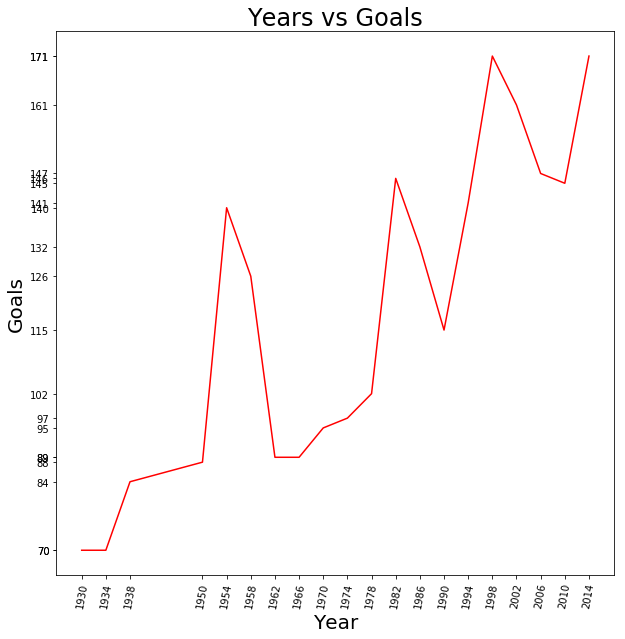

In [8]:
plt.figure(figsize=(10,10)) # generate a figure, with a figsize of 10x10 (tuple)
# set axis ticks
plt.xticks(worldCup["Year"], rotation='80')
plt.yticks(worldCup["GoalsScored"], rotation='horizontal')
# set axis labels and title
plt.xlabel("Year", fontsize=20)
plt.ylabel("Goals", fontsize=20)
plt.title("Years vs Goals", fontsize=24)
# now we plot
plt.plot(worldCup.Year, worldCup.GoalsScored, color="red")

### We really see an increase in goals over time

This could be because players really got amazing over time or that more and more countries were invited. I'm going to guess more the latter.

Why don't we check team participation.

Text(0.5,1,'Number of teams qualifying per year')

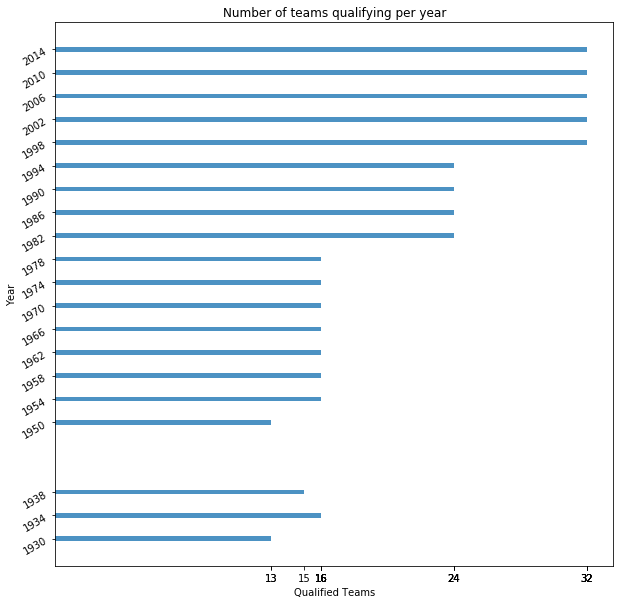

In [9]:
plt.figure(figsize=(10,10))
plt.barh(worldCup.Year, worldCup.QualifiedTeams, alpha=0.8)
plt.ylabel('Year')
plt.xlabel('Qualified Teams')
plt.yticks(worldCup["Year"], rotation=30)
plt.xticks(worldCup['QualifiedTeams'])
plt.title('Number of teams qualifying per year')

## Yes, indeed we see increased qualifiers during specific years: 
### - 1978-1982 

### - 1994-1998.

We also should note that we have no World Cups betwen 1938 and 1950, or at least no data.

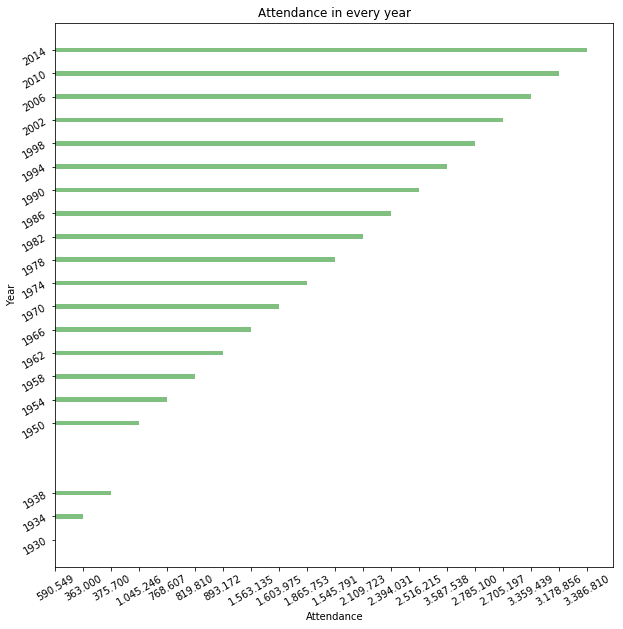

In [10]:
# let's check the attendance
plt.figure(figsize=(10, 10))
plt.barh(worldCup.Year,worldCup.Attendance,alpha=0.5,color='green') 
plt.ylabel('Year')
plt.xlabel('Attendance')
plt.yticks(worldCup.Year, rotation=30)
plt.xticks(worldCup.Attendance, rotation=30)
plt.title('Attendance in every year')
plt.show()

## Interesting, we see a pretty steady increase in attendance with each consecutive World Cup

Text(0.5,1,'MatchesPlayed')

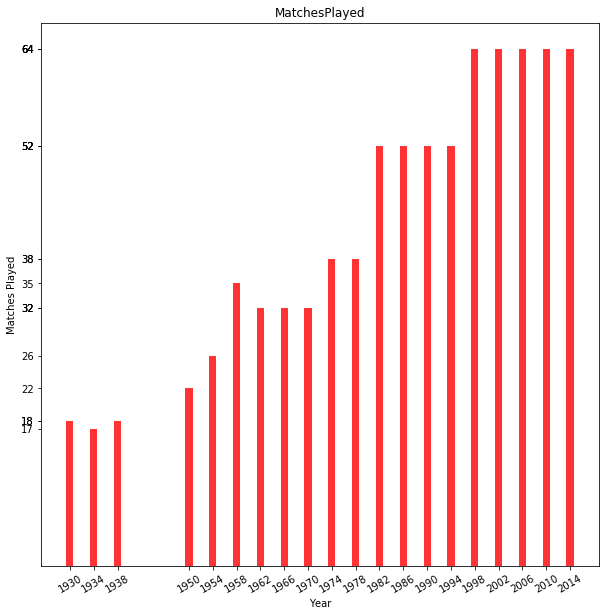

In [11]:
# matches played per year
plt.figure(figsize=(10,10))
plt.bar(worldCup.Year, worldCup.MatchesPlayed, width=1.2, alpha=0.8, color='red')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.xticks(worldCup.Year, rotation=30)
plt.yticks(worldCup.MatchesPlayed)
plt.title("MatchesPlayed")

## We also see that the number of matches played increases with each World Cup

Note: We see the biggest increases at:
- 1978-1982
- 1994 -1998

Thus seeming to correlate with the increased number of qualifying teams. Makes sense, since as the number of qualifying teams increases, there will need to be more matches for the tournament.

In [12]:
worldCup['Year']
# same as
worldCup.Year

0     1930
1     1934
2     1938
3     1950
4     1954
5     1958
6     1962
7     1966
8     1970
9     1974
10    1978
11    1982
12    1986
13    1990
14    1994
15    1998
16    2002
17    2006
18    2010
19    2014
Name: Year, dtype: int64

In [13]:
# total number of world cup wins by country
winner = worldCup["Winner"].value_counts()[:]
winner

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
Spain        1
England      1
France       1
Name: Winner, dtype: int64

In [14]:
# note, we create a pandas series, but not a dataframe
type(winner)

pandas.core.series.Series

## Fun Factoid: Teams have stars above their crest, where each star represents a World Cup Title

### So Brazil has 5, Argentina 2, etc.


In [15]:
# follow the above destructuring with the runner up, third place, and fourth place finishers
runner_up = worldCup['Runners-Up'].value_counts()[:]
third_place = worldCup["Third"].value_counts()[:]
fourth_place = worldCup["Fourth"].value_counts()[:]

In [16]:
# combine these Series (using the concat method) into a dataframe
placement = pd.concat([winner, runner_up, third_place, fourth_place], axis=1)
placement

Winner  Runners-Up  Third  Fourth
Argentina          2.0         3.0    NaN     NaN
Austria            NaN         NaN    1.0     1.0
Belgium            NaN         NaN    NaN     1.0
Brazil             5.0         2.0    2.0     2.0
Bulgaria           NaN         NaN    NaN     1.0
Chile              NaN         NaN    1.0     NaN
Croatia            NaN         NaN    1.0     NaN
Czechoslovakia     NaN         2.0    NaN     NaN
England            1.0         NaN    NaN     1.0
France             1.0         1.0    2.0     1.0
Germany            4.0         4.0    4.0     1.0
Hungary            NaN         2.0    NaN     NaN
Italy              4.0         2.0    1.0     1.0
Korea Republic     NaN         NaN    NaN     1.0
Netherlands        NaN         3.0    1.0     1.0
Poland             NaN         NaN    2.0     NaN
Portugal           NaN         NaN    1.0     1.0
Soviet Union       NaN         NaN    NaN     1.0
Spain              1.0         NaN    NaN     1.0
Sweden             NaN         1.0    2.0     1.0
Turkey             NaN         NaN    1.0     NaN
USA                NaN         NaN    1.0     NaN
Uruguay            2.0         NaN    NaN     3.0
Yugoslavia         NaN         NaN    NaN     2.0

In [17]:
# sort by each column...such that those countries that placed 1-4 sometime
# in their career are on top
placement = placement.sort_values(by=['Winner', 'Runners-Up', 'Third', 'Fourth'], ascending=False)
placement

Winner  Runners-Up  Third  Fourth
Brazil             5.0         2.0    2.0     2.0
Germany            4.0         4.0    4.0     1.0
Italy              4.0         2.0    1.0     1.0
Argentina          2.0         3.0    NaN     NaN
Uruguay            2.0         NaN    NaN     3.0
France             1.0         1.0    2.0     1.0
England            1.0         NaN    NaN     1.0
Spain              1.0         NaN    NaN     1.0
Netherlands        NaN         3.0    1.0     1.0
Czechoslovakia     NaN         2.0    NaN     NaN
Hungary            NaN         2.0    NaN     NaN
Sweden             NaN         1.0    2.0     1.0
Poland             NaN         NaN    2.0     NaN
Austria            NaN         NaN    1.0     1.0
Portugal           NaN         NaN    1.0     1.0
Chile              NaN         NaN    1.0     NaN
Croatia            NaN         NaN    1.0     NaN
Turkey             NaN         NaN    1.0     NaN
USA                NaN         NaN    1.0     NaN
Yugoslavia         NaN         NaN    NaN     2.0
Belgium            NaN         NaN    NaN     1.0
Bulgaria           NaN         NaN    NaN     1.0
Korea Republic     NaN         NaN    NaN     1.0
Soviet Union       NaN         NaN    NaN     1.0

In [18]:
# after sorting, we can make a leap and say that those entries with NaN (not a number) in fact represent 0
# we'll fill in those NaN with value=0
placement = placement.fillna(value=0)
placement

Winner  Runners-Up  Third  Fourth
Brazil             5.0         2.0    2.0     2.0
Germany            4.0         4.0    4.0     1.0
Italy              4.0         2.0    1.0     1.0
Argentina          2.0         3.0    0.0     0.0
Uruguay            2.0         0.0    0.0     3.0
France             1.0         1.0    2.0     1.0
England            1.0         0.0    0.0     1.0
Spain              1.0         0.0    0.0     1.0
Netherlands        0.0         3.0    1.0     1.0
Czechoslovakia     0.0         2.0    0.0     0.0
Hungary            0.0         2.0    0.0     0.0
Sweden             0.0         1.0    2.0     1.0
Poland             0.0         0.0    2.0     0.0
Austria            0.0         0.0    1.0     1.0
Portugal           0.0         0.0    1.0     1.0
Chile              0.0         0.0    1.0     0.0
Croatia            0.0         0.0    1.0     0.0
Turkey             0.0         0.0    1.0     0.0
USA                0.0         0.0    1.0     0.0
Yugoslavia         0.0         0.0    0.0     2.0
Belgium            0.0         0.0    0.0     1.0
Bulgaria           0.0         0.0    0.0     1.0
Korea Republic     0.0         0.0    0.0     1.0
Soviet Union       0.0         0.0    0.0     1.0

## Now that looks like a real table! 
### Let's plot it then:

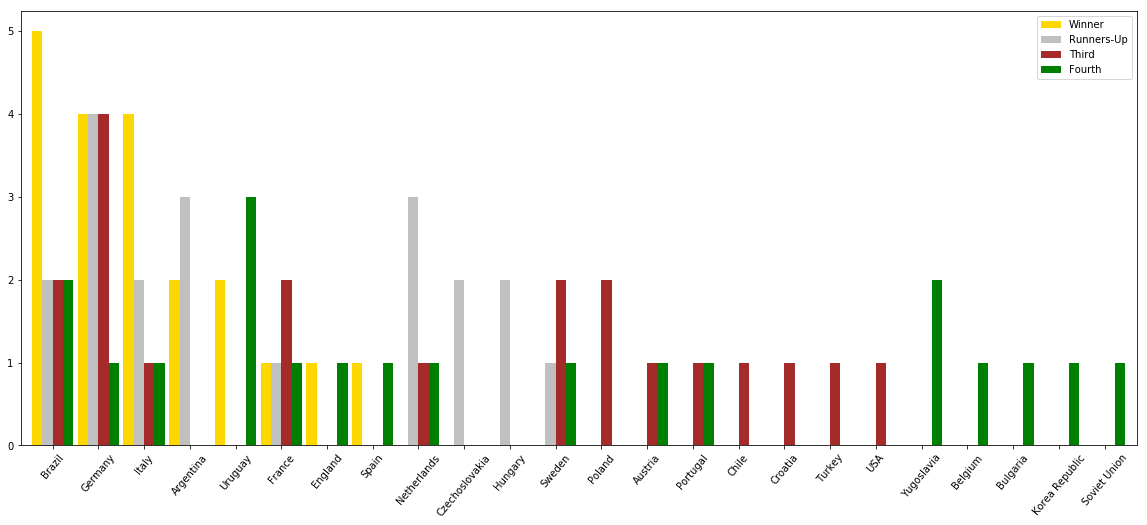

In [19]:
placement.plot(y=["Winner", "Runners-Up", "Third", "Fourth"], kind="bar", color=['gold', 'silver', 'brown', 'green'], figsize=(20, 8), width=0.9, rot=50)

## Winners and overall placement seems to be top heavy, dominated by Brazil, Germany, and Italy

### These are certainly top quality teams.

### Enough about countries, let's look at matches

In [20]:
from itertools import cycle, islice

In [21]:
matches.head()

Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   
3                     2549.0                   1.0                   0.0   
4                    23409.0                   0.0                   0.0   

                  Referee               Assistant 1  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3   WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4     REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   

                  Assistant 2  RoundID  MatchID Home Team Initials  \
0         REGO Gilberto (BRA)    201.0   1096.0                FRA   
1       WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2         BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3    MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4  RADULESCU Constantin (ROU)    201.0   1085.0                ARG   

  Away Team Initials  
0                MEX  
1                BEL  
2                BRA  
3                PER  
4                FRA

In [22]:
# set home/away teams to separate pandas series the matches dataframe
home_team = matches['Home Team Name']
away_team = matches['Away Team Name']

In [23]:
# Let's check values within home_team:
home_team.value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
Germany                       34
Netherlands                   32
France                        31
Spain                         30
Uruguay                       28
Sweden                        27
Hungary                       18
Soviet Union                  18
Belgium                       18
Yugoslavia                    17
Portugal                      16
Poland                        16
Mexico                        16
USA                           15
Chile                         14
Korea Republic                14
Austria                       13
Switzerland                   12
Paraguay                      11
Cameroon                      11
Japan                         10
Czechoslovakia                10
Romania                        9
Scotland                       9
Nigeria                        9
          

In [24]:
# again, matches has Germany FR, which we know is just Germany
# let's replace it
matches.replace(to_replace="Germany FR", value="Germany", inplace=True)

In [25]:
# and let's check again
home_team.value_counts()

Brazil                        82
Germany                       77
Italy                         57
Argentina                     54
England                       35
Netherlands                   32
France                        31
Spain                         30
Uruguay                       28
Sweden                        27
Belgium                       18
Soviet Union                  18
Hungary                       18
Yugoslavia                    17
Portugal                      16
Poland                        16
Mexico                        16
USA                           15
Chile                         14
Korea Republic                14
Austria                       13
Switzerland                   12
Paraguay                      11
Cameroon                      11
Japan                         10
Czechoslovakia                10
Romania                        9
Scotland                       9
Nigeria                        9
Bulgaria                       7
          

## It is unsurprising that two of the top teams in World Cup wins have the most matches played: Germany and Brazil

### Notice that we have some abnormalities in our naming, notably some countries have rn"> in front of it
### Let's remove that

In [26]:
matches = matches.replace(to_replace='rn">', value ="", regex=True)

In [27]:
matches["Home Team Name"].value_counts()

Brazil                    82
Germany                   77
Italy                     57
Argentina                 54
England                   35
Netherlands               32
France                    31
Spain                     30
Uruguay                   28
Sweden                    27
Belgium                   18
Hungary                   18
Soviet Union              18
Yugoslavia                17
Portugal                  16
Mexico                    16
Poland                    16
USA                       15
Chile                     14
Korea Republic            14
Austria                   13
Switzerland               12
Paraguay                  11
Cameroon                  11
Czechoslovakia            10
Japan                     10
Nigeria                    9
Scotland                   9
Romania                    9
Bulgaria                   7
                          ..
C�te d'Ivoire              3
Slovenia                   3
Croatia                    3
Russia        

Now those look like real country names!

In [28]:
# Let's sum up the home and away goals
home_goals = matches.groupby(['Home Team Name'], as_index=False)[["Home Team Goals"]].sum()
home_goals

Home Team Name  Home Team Goals
0                  Algeria              5.0
1                   Angola              0.0
2                Argentina            111.0
3                Australia              7.0
4                  Austria             31.0
5                  Belgium             27.0
6                  Bolivia              1.0
7   Bosnia and Herzegovina              3.0
8                   Brazil            180.0
9                 Bulgaria             11.0
10                Cameroon             11.0
11                  Canada              0.0
12                   Chile             25.0
13                China PR              0.0
14                Colombia             11.0
15              Costa Rica              7.0
16                 Croatia              3.0
17                    Cuba              5.0
18          Czech Republic              0.0
19          Czechoslovakia             27.0
20           C�te d'Ivoire              5.0
21                 Denmark             13.0
22                 Ecuador              4.0
23                 England             54.0
24                  France             68.0
25               German DR              3.0
26                 Germany            168.0
27                   Ghana              4.0
28                  Greece              4.0
29                   Haiti              0.0
..                     ...              ...
47                Paraguay             14.0
48                    Peru             13.0
49                  Poland             27.0
50                Portugal             36.0
51     Republic of Ireland              2.0
52                 Romania             15.0
53                  Russia              9.0
54            Saudi Arabia              3.0
55                Scotland             11.0
56                 Senegal              3.0
57                  Serbia              0.0
58   Serbia and Montenegro              0.0
59                Slovakia              3.0
60                Slovenia              3.0
61            South Africa              7.0
62            Soviet Union             43.0
63                   Spain             50.0
64                  Sweden             53.0
65             Switzerland             22.0
66                    Togo              0.0
67     Trinidad and Tobago              0.0
68                 Tunisia              6.0
69                  Turkey             10.0
70                     USA             19.0
71                 Ukraine              1.0
72    United Arab Emirates              0.0
73                 Uruguay             62.0
74                   Wales              2.0
75              Yugoslavia             42.0
76                   Zaire              0.0

[77 rows x 2 columns]

In [29]:
away_goals =matches.groupby(["Away Team Name"], as_index=False)[["Away Team Goals"]].sum()
away_goals

Away Team Name  Away Team Goals
0                  Algeria              9.0
1                   Angola              1.0
2                Argentina             22.0
3                Australia              4.0
4                  Austria             12.0
5                  Belgium             27.0
6                  Bolivia              0.0
7   Bosnia and Herzegovina              1.0
8                   Brazil             45.0
9                 Bulgaria             11.0
10                Cameroon              7.0
11                  Canada              0.0
12                   Chile             16.0
13                China PR              0.0
14                Colombia             18.0
15              Costa Rica             11.0
16                 Croatia             18.0
17                    Cuba              0.0
18          Czech Republic              3.0
19          Czechoslovakia             17.0
20           C�te d'Ivoire              8.0
21                 Denmark             14.0
22       Dutch East Indies              0.0
23                 Ecuador              6.0
24                   Egypt              3.0
25             El Salvador              1.0
26                 England             25.0
27                  France             40.0
28               German DR              2.0
29                 Germany             67.0
..                     ...              ...
52                Paraguay             16.0
53                    Peru              6.0
54                  Poland             17.0
55                Portugal              7.0
56     Republic of Ireland              8.0
57                 Romania             15.0
58                  Russia              4.0
59            Saudi Arabia              6.0
60                Scotland             14.0
61                 Senegal              4.0
62                  Serbia              2.0
63   Serbia and Montenegro              2.0
64                Slovakia              2.0
65                Slovenia              2.0
66            South Africa              4.0
67            Soviet Union             10.0
68                   Spain             42.0
69                  Sweden             21.0
70             Switzerland             23.0
71                    Togo              1.0
72     Trinidad and Tobago              0.0
73                 Tunisia              2.0
74                  Turkey             10.0
75                     USA             19.0
76                 Ukraine              4.0
77    United Arab Emirates              2.0
78                 Uruguay             18.0
79                   Wales              2.0
80              Yugoslavia             18.0
81                   Zaire              0.0

[82 rows x 2 columns]

In [30]:
# and we can rename them to home_goals, rather than Home Team Goals
home_goals = home_goals.rename(index=str, columns={"Home Team Name": "country", "Home Team Goals" : "home_goals"})
home_goals

country  home_goals
0                  Algeria         5.0
1                   Angola         0.0
2                Argentina       111.0
3                Australia         7.0
4                  Austria        31.0
5                  Belgium        27.0
6                  Bolivia         1.0
7   Bosnia and Herzegovina         3.0
8                   Brazil       180.0
9                 Bulgaria        11.0
10                Cameroon        11.0
11                  Canada         0.0
12                   Chile        25.0
13                China PR         0.0
14                Colombia        11.0
15              Costa Rica         7.0
16                 Croatia         3.0
17                    Cuba         5.0
18          Czech Republic         0.0
19          Czechoslovakia        27.0
20           C�te d'Ivoire         5.0
21                 Denmark        13.0
22                 Ecuador         4.0
23                 England        54.0
24                  France        68.0
25               German DR         3.0
26                 Germany       168.0
27                   Ghana         4.0
28                  Greece         4.0
29                   Haiti         0.0
..                     ...         ...
47                Paraguay        14.0
48                    Peru        13.0
49                  Poland        27.0
50                Portugal        36.0
51     Republic of Ireland         2.0
52                 Romania        15.0
53                  Russia         9.0
54            Saudi Arabia         3.0
55                Scotland        11.0
56                 Senegal         3.0
57                  Serbia         0.0
58   Serbia and Montenegro         0.0
59                Slovakia         3.0
60                Slovenia         3.0
61            South Africa         7.0
62            Soviet Union        43.0
63                   Spain        50.0
64                  Sweden        53.0
65             Switzerland        22.0
66                    Togo         0.0
67     Trinidad and Tobago         0.0
68                 Tunisia         6.0
69                  Turkey        10.0
70                     USA        19.0
71                 Ukraine         1.0
72    United Arab Emirates         0.0
73                 Uruguay        62.0
74                   Wales         2.0
75              Yugoslavia        42.0
76                   Zaire         0.0

[77 rows x 2 columns]

In [31]:
# same with away_goals
away_goals =away_goals.rename(index=str, columns={"Away Team Name": "country", "Away Team Goals": "away_goals"})
away_goals

country  away_goals
0                  Algeria         9.0
1                   Angola         1.0
2                Argentina        22.0
3                Australia         4.0
4                  Austria        12.0
5                  Belgium        27.0
6                  Bolivia         0.0
7   Bosnia and Herzegovina         1.0
8                   Brazil        45.0
9                 Bulgaria        11.0
10                Cameroon         7.0
11                  Canada         0.0
12                   Chile        16.0
13                China PR         0.0
14                Colombia        18.0
15              Costa Rica        11.0
16                 Croatia        18.0
17                    Cuba         0.0
18          Czech Republic         3.0
19          Czechoslovakia        17.0
20           C�te d'Ivoire         8.0
21                 Denmark        14.0
22       Dutch East Indies         0.0
23                 Ecuador         6.0
24                   Egypt         3.0
25             El Salvador         1.0
26                 England        25.0
27                  France        40.0
28               German DR         2.0
29                 Germany        67.0
..                     ...         ...
52                Paraguay        16.0
53                    Peru         6.0
54                  Poland        17.0
55                Portugal         7.0
56     Republic of Ireland         8.0
57                 Romania        15.0
58                  Russia         4.0
59            Saudi Arabia         6.0
60                Scotland        14.0
61                 Senegal         4.0
62                  Serbia         2.0
63   Serbia and Montenegro         2.0
64                Slovakia         2.0
65                Slovenia         2.0
66            South Africa         4.0
67            Soviet Union        10.0
68                   Spain        42.0
69                  Sweden        21.0
70             Switzerland        23.0
71                    Togo         1.0
72     Trinidad and Tobago         0.0
73                 Tunisia         2.0
74                  Turkey        10.0
75                     USA        19.0
76                 Ukraine         4.0
77    United Arab Emirates         2.0
78                 Uruguay        18.0
79                   Wales         2.0
80              Yugoslavia        18.0
81                   Zaire         0.0

[82 rows x 2 columns]

In [32]:
# we then merge home and away goals based on country
goals = home_goals.merge(away_goals, left_on="country", right_on="country", how="outer")
goals

country  home_goals  away_goals
0                  Algeria         5.0         9.0
1                   Angola         0.0         1.0
2                Argentina       111.0        22.0
3                Australia         7.0         4.0
4                  Austria        31.0        12.0
5                  Belgium        27.0        27.0
6                  Bolivia         1.0         0.0
7   Bosnia and Herzegovina         3.0         1.0
8                   Brazil       180.0        45.0
9                 Bulgaria        11.0        11.0
10                Cameroon        11.0         7.0
11                  Canada         0.0         0.0
12                   Chile        25.0        16.0
13                China PR         0.0         0.0
14                Colombia        11.0        18.0
15              Costa Rica         7.0        11.0
16                 Croatia         3.0        18.0
17                    Cuba         5.0         0.0
18          Czech Republic         0.0         3.0
19          Czechoslovakia        27.0        17.0
20           C�te d'Ivoire         5.0         8.0
21                 Denmark        13.0        14.0
22                 Ecuador         4.0         6.0
23                 England        54.0        25.0
24                  France        68.0        40.0
25               German DR         3.0         2.0
26                 Germany       168.0        67.0
27                   Ghana         4.0         9.0
28                  Greece         4.0         2.0
29                   Haiti         0.0         2.0
..                     ...         ...         ...
52                 Romania        15.0        15.0
53                  Russia         9.0         4.0
54            Saudi Arabia         3.0         6.0
55                Scotland        11.0        14.0
56                 Senegal         3.0         4.0
57                  Serbia         0.0         2.0
58   Serbia and Montenegro         0.0         2.0
59                Slovakia         3.0         2.0
60                Slovenia         3.0         2.0
61            South Africa         7.0         4.0
62            Soviet Union        43.0        10.0
63                   Spain        50.0        42.0
64                  Sweden        53.0        21.0
65             Switzerland        22.0        23.0
66                    Togo         0.0         1.0
67     Trinidad and Tobago         0.0         0.0
68                 Tunisia         6.0         2.0
69                  Turkey        10.0        10.0
70                     USA        19.0        19.0
71                 Ukraine         1.0         4.0
72    United Arab Emirates         0.0         2.0
73                 Uruguay        62.0        18.0
74                   Wales         2.0         2.0
75              Yugoslavia        42.0        18.0
76                   Zaire         0.0         0.0
77       Dutch East Indies         NaN         0.0
78                   Egypt         NaN         3.0
79             El Salvador         NaN         1.0
80                  Israel         NaN         1.0
81                  Kuwait         NaN         2.0

[82 rows x 3 columns]

In [33]:
# we see that there are some NaN values, so like before we will fill them with 0
goals = goals.fillna(value=0)
goals

country  home_goals  away_goals
0                  Algeria         5.0         9.0
1                   Angola         0.0         1.0
2                Argentina       111.0        22.0
3                Australia         7.0         4.0
4                  Austria        31.0        12.0
5                  Belgium        27.0        27.0
6                  Bolivia         1.0         0.0
7   Bosnia and Herzegovina         3.0         1.0
8                   Brazil       180.0        45.0
9                 Bulgaria        11.0        11.0
10                Cameroon        11.0         7.0
11                  Canada         0.0         0.0
12                   Chile        25.0        16.0
13                China PR         0.0         0.0
14                Colombia        11.0        18.0
15              Costa Rica         7.0        11.0
16                 Croatia         3.0        18.0
17                    Cuba         5.0         0.0
18          Czech Republic         0.0         3.0
19          Czechoslovakia        27.0        17.0
20           C�te d'Ivoire         5.0         8.0
21                 Denmark        13.0        14.0
22                 Ecuador         4.0         6.0
23                 England        54.0        25.0
24                  France        68.0        40.0
25               German DR         3.0         2.0
26                 Germany       168.0        67.0
27                   Ghana         4.0         9.0
28                  Greece         4.0         2.0
29                   Haiti         0.0         2.0
..                     ...         ...         ...
52                 Romania        15.0        15.0
53                  Russia         9.0         4.0
54            Saudi Arabia         3.0         6.0
55                Scotland        11.0        14.0
56                 Senegal         3.0         4.0
57                  Serbia         0.0         2.0
58   Serbia and Montenegro         0.0         2.0
59                Slovakia         3.0         2.0
60                Slovenia         3.0         2.0
61            South Africa         7.0         4.0
62            Soviet Union        43.0        10.0
63                   Spain        50.0        42.0
64                  Sweden        53.0        21.0
65             Switzerland        22.0        23.0
66                    Togo         0.0         1.0
67     Trinidad and Tobago         0.0         0.0
68                 Tunisia         6.0         2.0
69                  Turkey        10.0        10.0
70                     USA        19.0        19.0
71                 Ukraine         1.0         4.0
72    United Arab Emirates         0.0         2.0
73                 Uruguay        62.0        18.0
74                   Wales         2.0         2.0
75              Yugoslavia        42.0        18.0
76                   Zaire         0.0         0.0
77       Dutch East Indies         0.0         0.0
78                   Egypt         0.0         3.0
79             El Salvador         0.0         1.0
80                  Israel         0.0         1.0
81                  Kuwait         0.0         2.0

[82 rows x 3 columns]

In [34]:
# we then create a new column named total_goals which, surprise, is combining home and away goals
goals["total_goals"] = goals["home_goals"] + goals["away_goals"]
goals

country  home_goals  away_goals  total_goals
0                  Algeria         5.0         9.0         14.0
1                   Angola         0.0         1.0          1.0
2                Argentina       111.0        22.0        133.0
3                Australia         7.0         4.0         11.0
4                  Austria        31.0        12.0         43.0
5                  Belgium        27.0        27.0         54.0
6                  Bolivia         1.0         0.0          1.0
7   Bosnia and Herzegovina         3.0         1.0          4.0
8                   Brazil       180.0        45.0        225.0
9                 Bulgaria        11.0        11.0         22.0
10                Cameroon        11.0         7.0         18.0
11                  Canada         0.0         0.0          0.0
12                   Chile        25.0        16.0         41.0
13                China PR         0.0         0.0          0.0
14                Colombia        11.0        18.0         29.0
15              Costa Rica         7.0        11.0         18.0
16                 Croatia         3.0        18.0         21.0
17                    Cuba         5.0         0.0          5.0
18          Czech Republic         0.0         3.0          3.0
19          Czechoslovakia        27.0        17.0         44.0
20           C�te d'Ivoire         5.0         8.0         13.0
21                 Denmark        13.0        14.0         27.0
22                 Ecuador         4.0         6.0         10.0
23                 England        54.0        25.0         79.0
24                  France        68.0        40.0        108.0
25               German DR         3.0         2.0          5.0
26                 Germany       168.0        67.0        235.0
27                   Ghana         4.0         9.0         13.0
28                  Greece         4.0         2.0          6.0
29                   Haiti         0.0         2.0          2.0
..                     ...         ...         ...          ...
52                 Romania        15.0        15.0         30.0
53                  Russia         9.0         4.0         13.0
54            Saudi Arabia         3.0         6.0          9.0
55                Scotland        11.0        14.0         25.0
56                 Senegal         3.0         4.0          7.0
57                  Serbia         0.0         2.0          2.0
58   Serbia and Montenegro         0.0         2.0          2.0
59                Slovakia         3.0         2.0          5.0
60                Slovenia         3.0         2.0          5.0
61            South Africa         7.0         4.0         11.0
62            Soviet Union        43.0        10.0         53.0
63                   Spain        50.0        42.0         92.0
64                  Sweden        53.0        21.0         74.0
65             Switzerland        22.0        23.0         45.0
66                    Togo         0.0         1.0          1.0
67     Trinidad and Tobago         0.0         0.0          0.0
68                 Tunisia         6.0         2.0          8.0
69                  Turkey        10.0        10.0         20.0
70                     USA        19.0        19.0         38.0
71                 Ukraine         1.0         4.0          5.0
72    United Arab Emirates         0.0         2.0          2.0
73                 Uruguay        62.0        18.0         80.0
74                   Wales         2.0         2.0          4.0
75              Yugoslavia        42.0        18.0         60.0
76                   Zaire         0.0         0.0          0.0
77       Dutch East Indies         0.0         0.0          0.0
78                   Egypt         0.0         3.0          3.0
79             El Salvador         0.0         1.0          1.0
80                  Israel         0.0         1.0          1.0
81                  Kuwait         0.0         2.0          2.0

[82 rows x 4 columns]

In [35]:
# since we want countries that can at least score 1 goal, we'll set our goals variable to those that don't have 0 goals
goals = goals[goals.total_goals != 0]
goals

country  home_goals  away_goals  total_goals
0                  Algeria         5.0         9.0         14.0
1                   Angola         0.0         1.0          1.0
2                Argentina       111.0        22.0        133.0
3                Australia         7.0         4.0         11.0
4                  Austria        31.0        12.0         43.0
5                  Belgium        27.0        27.0         54.0
6                  Bolivia         1.0         0.0          1.0
7   Bosnia and Herzegovina         3.0         1.0          4.0
8                   Brazil       180.0        45.0        225.0
9                 Bulgaria        11.0        11.0         22.0
10                Cameroon        11.0         7.0         18.0
12                   Chile        25.0        16.0         41.0
14                Colombia        11.0        18.0         29.0
15              Costa Rica         7.0        11.0         18.0
16                 Croatia         3.0        18.0         21.0
17                    Cuba         5.0         0.0          5.0
18          Czech Republic         0.0         3.0          3.0
19          Czechoslovakia        27.0        17.0         44.0
20           C�te d'Ivoire         5.0         8.0         13.0
21                 Denmark        13.0        14.0         27.0
22                 Ecuador         4.0         6.0         10.0
23                 England        54.0        25.0         79.0
24                  France        68.0        40.0        108.0
25               German DR         3.0         2.0          5.0
26                 Germany       168.0        67.0        235.0
27                   Ghana         4.0         9.0         13.0
28                  Greece         4.0         2.0          6.0
29                   Haiti         0.0         2.0          2.0
30                Honduras         2.0         1.0          3.0
31                 Hungary        73.0        14.0         87.0
..                     ...         ...         ...          ...
49                  Poland        27.0        17.0         44.0
50                Portugal        36.0         7.0         43.0
51     Republic of Ireland         2.0         8.0         10.0
52                 Romania        15.0        15.0         30.0
53                  Russia         9.0         4.0         13.0
54            Saudi Arabia         3.0         6.0          9.0
55                Scotland        11.0        14.0         25.0
56                 Senegal         3.0         4.0          7.0
57                  Serbia         0.0         2.0          2.0
58   Serbia and Montenegro         0.0         2.0          2.0
59                Slovakia         3.0         2.0          5.0
60                Slovenia         3.0         2.0          5.0
61            South Africa         7.0         4.0         11.0
62            Soviet Union        43.0        10.0         53.0
63                   Spain        50.0        42.0         92.0
64                  Sweden        53.0        21.0         74.0
65             Switzerland        22.0        23.0         45.0
66                    Togo         0.0         1.0          1.0
68                 Tunisia         6.0         2.0          8.0
69                  Turkey        10.0        10.0         20.0
70                     USA        19.0        19.0         38.0
71                 Ukraine         1.0         4.0          5.0
72    United Arab Emirates         0.0         2.0          2.0
73                 Uruguay        62.0        18.0         80.0
74                   Wales         2.0         2.0          4.0
75              Yugoslavia        42.0        18.0         60.0
78                   Egypt         0.0         3.0          3.0
79             El Salvador         0.0         1.0          1.0
80                  Israel         0.0         1.0          1.0
81                  Kuwait         0.0         2.0          2.0

[77 rows x 4 columns]

In [36]:
# it's nice to sort the data, so we'll sort them by total goals
goals.sort_values(by=['total_goals'], ascending=False, inplace=True)
goals

country  home_goals  away_goals  total_goals
26                 Germany       168.0        67.0        235.0
8                   Brazil       180.0        45.0        225.0
2                Argentina       111.0        22.0        133.0
35                   Italy        99.0        29.0        128.0
24                  France        68.0        40.0        108.0
63                   Spain        50.0        42.0         92.0
42             Netherlands        51.0        40.0         91.0
31                 Hungary        73.0        14.0         87.0
73                 Uruguay        62.0        18.0         80.0
23                 England        54.0        25.0         79.0
64                  Sweden        53.0        21.0         74.0
75              Yugoslavia        42.0        18.0         60.0
40                  Mexico        22.0        36.0         58.0
5                  Belgium        27.0        27.0         54.0
62            Soviet Union        43.0        10.0         53.0
65             Switzerland        22.0        23.0         45.0
19          Czechoslovakia        27.0        17.0         44.0
49                  Poland        27.0        17.0         44.0
4                  Austria        31.0        12.0         43.0
50                Portugal        36.0         7.0         43.0
12                   Chile        25.0        16.0         41.0
70                     USA        19.0        19.0         38.0
39          Korea Republic        18.0        13.0         31.0
52                 Romania        15.0        15.0         30.0
47                Paraguay        14.0        16.0         30.0
14                Colombia        11.0        18.0         29.0
21                 Denmark        13.0        14.0         27.0
55                Scotland        11.0        14.0         25.0
9                 Bulgaria        11.0        11.0         22.0
16                 Croatia         3.0        18.0         21.0
..                     ...         ...         ...          ...
68                 Tunisia         6.0         2.0          8.0
46                  Norway         1.0         6.0          7.0
56                 Senegal         3.0         4.0          7.0
38               Korea DPR         2.0         4.0          6.0
28                  Greece         4.0         2.0          6.0
71                 Ukraine         1.0         4.0          5.0
25               German DR         3.0         2.0          5.0
60                Slovenia         3.0         2.0          5.0
59                Slovakia         3.0         2.0          5.0
33                    Iran         1.0         4.0          5.0
17                    Cuba         5.0         0.0          5.0
74                   Wales         2.0         2.0          4.0
43             New Zealand         1.0         3.0          4.0
7   Bosnia and Herzegovina         3.0         1.0          4.0
30                Honduras         2.0         1.0          3.0
36                 Jamaica         1.0         2.0          3.0
78                   Egypt         0.0         3.0          3.0
18          Czech Republic         0.0         3.0          3.0
72    United Arab Emirates         0.0         2.0          2.0
58   Serbia and Montenegro         0.0         2.0          2.0
57                  Serbia         0.0         2.0          2.0
29                   Haiti         0.0         2.0          2.0
32                 IR Iran         0.0         2.0          2.0
81                  Kuwait         0.0         2.0          2.0
66                    Togo         0.0         1.0          1.0
6                  Bolivia         1.0         0.0          1.0
34                    Iraq         1.0         0.0          1.0
1                   Angola         0.0         1.0          1.0
79             El Salvador         0.0         1.0          1.0
80                  Israel         0.0         1.0          1.0

[77 rows x 4 columns]

In [37]:
# and then reset the index
goals.reset_index(drop=True, inplace=True)
goals

country  home_goals  away_goals  total_goals
0                  Germany       168.0        67.0        235.0
1                   Brazil       180.0        45.0        225.0
2                Argentina       111.0        22.0        133.0
3                    Italy        99.0        29.0        128.0
4                   France        68.0        40.0        108.0
5                    Spain        50.0        42.0         92.0
6              Netherlands        51.0        40.0         91.0
7                  Hungary        73.0        14.0         87.0
8                  Uruguay        62.0        18.0         80.0
9                  England        54.0        25.0         79.0
10                  Sweden        53.0        21.0         74.0
11              Yugoslavia        42.0        18.0         60.0
12                  Mexico        22.0        36.0         58.0
13                 Belgium        27.0        27.0         54.0
14            Soviet Union        43.0        10.0         53.0
15             Switzerland        22.0        23.0         45.0
16          Czechoslovakia        27.0        17.0         44.0
17                  Poland        27.0        17.0         44.0
18                 Austria        31.0        12.0         43.0
19                Portugal        36.0         7.0         43.0
20                   Chile        25.0        16.0         41.0
21                     USA        19.0        19.0         38.0
22          Korea Republic        18.0        13.0         31.0
23                 Romania        15.0        15.0         30.0
24                Paraguay        14.0        16.0         30.0
25                Colombia        11.0        18.0         29.0
26                 Denmark        13.0        14.0         27.0
27                Scotland        11.0        14.0         25.0
28                Bulgaria        11.0        11.0         22.0
29                 Croatia         3.0        18.0         21.0
..                     ...         ...         ...          ...
47                 Tunisia         6.0         2.0          8.0
48                  Norway         1.0         6.0          7.0
49                 Senegal         3.0         4.0          7.0
50               Korea DPR         2.0         4.0          6.0
51                  Greece         4.0         2.0          6.0
52                 Ukraine         1.0         4.0          5.0
53               German DR         3.0         2.0          5.0
54                Slovenia         3.0         2.0          5.0
55                Slovakia         3.0         2.0          5.0
56                    Iran         1.0         4.0          5.0
57                    Cuba         5.0         0.0          5.0
58                   Wales         2.0         2.0          4.0
59             New Zealand         1.0         3.0          4.0
60  Bosnia and Herzegovina         3.0         1.0          4.0
61                Honduras         2.0         1.0          3.0
62                 Jamaica         1.0         2.0          3.0
63                   Egypt         0.0         3.0          3.0
64          Czech Republic         0.0         3.0          3.0
65    United Arab Emirates         0.0         2.0          2.0
66   Serbia and Montenegro         0.0         2.0          2.0
67                  Serbia         0.0         2.0          2.0
68                   Haiti         0.0         2.0          2.0
69                 IR Iran         0.0         2.0          2.0
70                  Kuwait         0.0         2.0          2.0
71                    Togo         0.0         1.0          1.0
72                 Bolivia         1.0         0.0          1.0
73                    Iraq         1.0         0.0          1.0
74                  Angola         0.0         1.0          1.0
75             El Salvador         0.0         1.0          1.0
76                  Israel         0.0         1.0          1.0

[77 rows x 4 columns]

In [38]:
# set a key
key = goals['country']
goals = goals.iloc[key.argsort()]

In [39]:
# set colors for visualization
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(goals)))
my_colors

['b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r',
 'g',
 'y',
 'k',
 'b',
 'r']

Text(0.5,1,'goals by country')

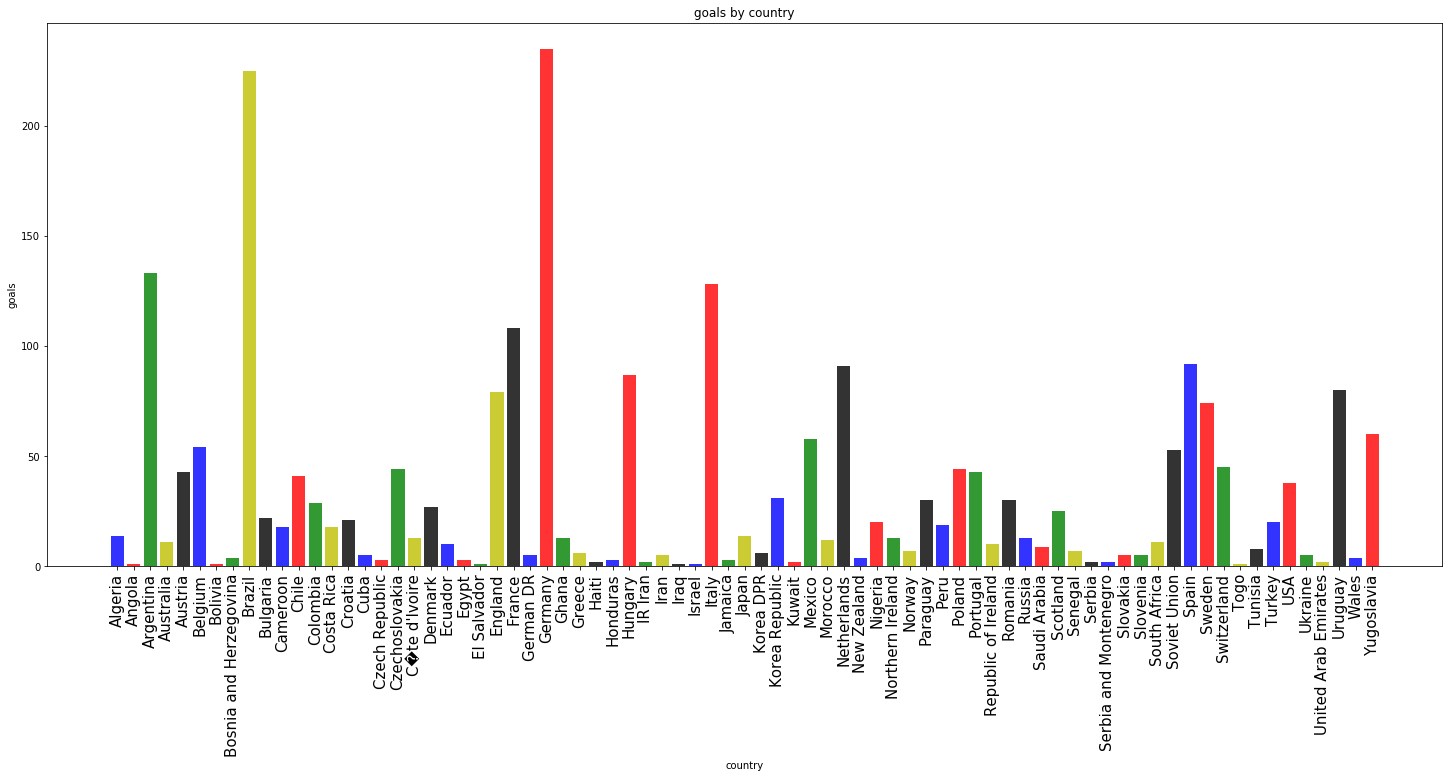

In [40]:
# and we're ready to visualize!
plt.figure(figsize=(25,10))
plt.bar(goals.country, goals.total_goals, alpha=0.8, color=my_colors)
plt.xlabel('country')
plt.ylabel("goals")
plt.xticks(goals.country, rotation=90, size=15)
plt.title('goals by country')

In [41]:
# word cloud
!python -m pip install --upgrade pip
!pip install wordcloud

Requirement already up-to-date: pip in c:\users\bboub\appdata\local\continuum\anaconda3\lib\site-packages (18.0)


## Time to look at the players
### we'll start by getting a figure set up and setting Player Name to famous_players variable

In [42]:
plt.figure(figsize=(15,15))
famous_players = players["Player Name"]

<Figure size 1080x1080 with 0 Axes>

In [43]:
famous_players

0               Alex THEPOT
1           Oscar BONFIGLIO
2          Marcel LANGILLER
3              Juan CARRENO
4           Ernest LIBERATI
5              Rafael GARZA
6           Andre MASCHINOT
7             Hilario LOPEZ
8           Etienne MATTLER
9            Dionisio MEJIA
10             Marcel PINEL
11             Felipe ROSAS
12          Alex VILLAPLANE
13             Manuel ROSAS
14           Lucien LAURENT
15                Jose RUIZ
16           Marcel CAPELLE
17          Alfredo SANCHEZ
18        Augustin CHANTREL
19           Efrain AMEZCUA
20           Edmond DELFOUR
21               Luis PEREZ
22          Celestin DELMER
23             Isidoro SOTA
24             Andre TASSIN
25             Jesus CASTRO
26            Nouma ANDOIRE
27          Felipe OLIVARES
28             Jean LAURENT
29       Raimundo RODRIGUEZ
                ...        
37754                 KROOS
37755            DEMICHELIS
37756               BOATENG
37757                  ROJO
37758               

In [44]:
counts =famous_players.value_counts().to_dict()
counts

{'RONALDO': 33,
 'KLOSE': 32,
 'M�LLER': 28,
 'OSCAR': 28,
 'CAFU': 26,
 'JULIO CESAR': 26,
 'Sepp MAIER': 25,
 'DIDA': 25,
 'SILVA': 25,
 'LEAO': 25,
 'PODOLSKI': 25,
 'MERTESACKER': 25,
 'LAHM': 25,
 'SCHWEINSTEIGER': 25,
 'Wladyslaw ZMUDA': 24,
 'Giuseppe BERGOMI': 23,
 'Dino ZOFF': 23,
 'Diego MARADONA': 23,
 'SNEIJDER': 22,
 'ROBBEN': 22,
 'Karl-Heinz SCHNELLINGER': 22,
 'PEPE': 22,
 'V. PERSIE': 22,
 'Uwe SEELER': 22,
 'KUYT': 22,
 'Franco BARESI': 21,
 'MESSI': 21,
 'PEREZ': 21,
 'NILTON SANTOS': 21,
 'ROMERO': 21,
 'Pierre LITTBARSKI': 21,
 'MASCHERANO': 21,
 'RAMOS': 21,
 'JAMES': 21,
 'CASTILHO': 21,
 'Lothar MATTHAEUS': 21,
 'PEL� (Edson Arantes do Nascimento)': 21,
 'RIVELINO': 20,
 'GOMEZ': 20,
 'Grzegorz LATO': 20,
 'JONES': 20,
 'EDU': 20,
 'Marek KUSTO': 20,
 'Karl-Heinz RUMMENIGGE': 20,
 'Andrzej SZARMACH': 20,
 'Andreas BREHME': 19,
 'Franz BECKENBAUER': 19,
 'Rudi VOELLER': 19,
 'Juergen GRABOWSKI': 19,
 'Horst-Dieter HOETTGES': 19,
 'Olaf THON': 19,
 'Nery PUMPIDO':

In [45]:
import wordcloud
wordcloud = wordcloud.WordCloud(background_color='white', max_words=200, max_font_size=40).generate_from_frequencies(counts)

In [46]:
# we'll rename columns to remove spaces
matches.rename(columns={'Home Team Name': 'HomeTeamName', 'Away Team Name': 'AwayTeamName'}, inplace=True)

In [47]:
# and we'll extract some teams into the teams variable
teams = ['Belgium', 'England']

## For fun, we'll look at a few team matchups

In [48]:
# We'll look at some powerhouse teams, starting with Belgium and England
# let's set belVsEng variable to those matches where Belgium and England
## are home OR away (remember, we set them to the teams variable)
belVsEng = matches.loc[matches.HomeTeamName.isin(teams)|matches.AwayTeamName.isin(teams)]

In [49]:
England_faceoff = belVsEng.loc[(belVsEng['HomeTeamName']=='England')|(belVsEng['AwayTeamName']=='England')]

In [50]:
for i in England_faceoff.index:
    if England_faceoff.at[i, 'HomeTeamName']=='England':
        England_faceoff.at[i, 'goals'] = England_faceoff.at[i, 'Home Team Goals']
        England_faceoff.at[i, 'country'] = England_faceoff.at[i, 'HomeTeamName']
    else:
        England_faceoff.at[i, 'goals'] = England_faceoff.at[i, 'Away Team Goals']
        England_faceoff.at[i, 'country'] = England_faceoff.at[i, 'AwayTeamName']
        
England_faceoff = England_faceoff.reset_index()

England_faceoff_goals=pd.DataFrame()
England_faceoff_goals=England_faceoff[['Year', 'country', 'goals']]
England_faceoff_goals
England_faceoff_Yeargoals = England_faceoff_goals.groupby(['Year','country'], as_index=False).sum()

In [51]:
### Same for Belgium:

Belgium_faceoff = belVsEng.loc[(belVsEng['HomeTeamName']=='Belgium')| (belVsEng['AwayTeamName']=='Belgium')]
for i in Belgium_faceoff.index:
    if Belgium_faceoff.at[i,'HomeTeamName']=='Belgium':
        Belgium_faceoff.at[i, 'goals'] = Belgium_faceoff.at[i,'Home Team Goals']
        Belgium_faceoff.at[i, 'country'] = Belgium_faceoff.at[i,'HomeTeamName']
    else:
        Belgium_faceoff.at[i, 'goals'] = Belgium_faceoff.at[i,'Away Team Goals']
        Belgium_faceoff.at[i, 'country'] = Belgium_faceoff.at[i,'AwayTeamName']

Belgium_faceoff =Belgium_faceoff.reset_index()


Belgium_faceoff_goals=pd.DataFrame()
Belgium_faceoff_goals=Belgium_faceoff[['Year','country','goals']]
Belgium_faceoff_goals.reset_index()
Belgium_faceoff_Yeargoals = Belgium_faceoff_goals.groupby(['Year','country'], as_index=False).sum()

['1930.0' '1934.0' '1938.0' '1950.0' '1954.0' '1958.0' '1962.0' '1966.0'
 '1970.0' '1982.0' '1986.0' '1990.0' '1994.0' '1998.0' '2002.0' '2006.0'
 '2010.0' '2014.0']


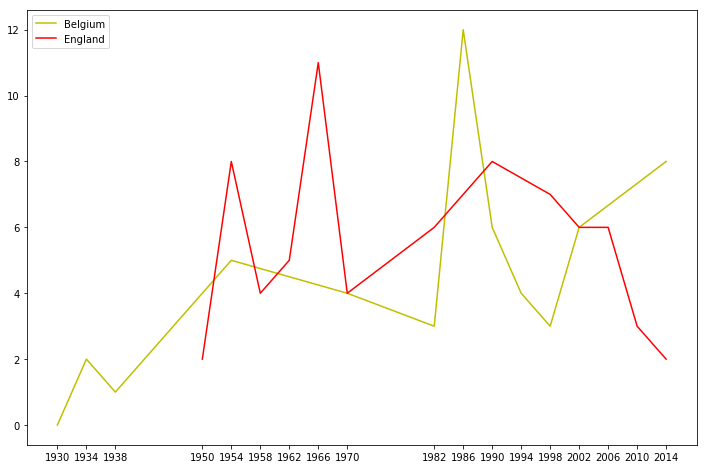

In [52]:
years=[]
years1 =Belgium_faceoff_Yeargoals.Year
years2 =England_faceoff_Yeargoals.Year
years = years1.append(years2)

years_array = pd.Series(years).values
years_array = np.unique(years_array)

years_array_string = years_array.astype(np.str)
print(years_array_string)

plt.figure(figsize=(12, 8))
plt.plot(Belgium_faceoff_Yeargoals.Year, Belgium_faceoff_Yeargoals.goals, '-y', label='Belgium')
plt.plot(England_faceoff_Yeargoals.Year, England_faceoff_Yeargoals.goals,'-r', label='England')
plt.legend(loc='upper left')
plt.xticks(years_array)
plt.show()

## Last matchup we will analyze is France vs. Croatia
## The 2018 Finals matchup

In [53]:
matches.rename(columns={'Home Team Name': 'HomeTeamName', 'Away Team Name': 'AwayTeamName'}, inplace=True)
teams = ['France','Croatia']
franvsCro = matches.loc[matches.HomeTeamName.isin(teams) | matches.AwayTeamName.isin(teams)]

In [54]:
France_faceoff = franvsCro.loc[(franvsCro['HomeTeamName']=='France')| (franvsCro['AwayTeamName']=='France')]

for i in France_faceoff.index:
    if France_faceoff.at[i,'HomeTeamName']=='France':
        France_faceoff.at[i, 'goals'] = France_faceoff.at[i,'Home Team Goals']
        France_faceoff.at[i, 'country'] = France_faceoff.at[i,'HomeTeamName']
    else:
        France_faceoff.at[i, 'goals'] = France_faceoff.at[i,'Away Team Goals']
        France_faceoff.at[i, 'country'] = France_faceoff.at[i,'AwayTeamName']

France_faceoff =France_faceoff.reset_index()


France_faceoff_goals=pd.DataFrame()
France_faceoff_goals=France_faceoff[['Year','country','goals']]
##France_faceoff_goals
France_faceoff_Yeargoals = France_faceoff_goals.groupby(['Year','country'], as_index=False).sum()



In [55]:
### Same for Croatia:

Croatia_faceoff = franvsCro.loc[(franvsCro['HomeTeamName']=='Croatia')| (franvsCro['AwayTeamName']=='Croatia')]
for i in Croatia_faceoff.index:
    if Croatia_faceoff.at[i,'HomeTeamName']=='Croatia':
        Croatia_faceoff.at[i, 'goals'] = Croatia_faceoff.at[i,'Home Team Goals']
        Croatia_faceoff.at[i, 'country'] = Croatia_faceoff.at[i,'HomeTeamName']
    else:
        Croatia_faceoff.at[i, 'goals'] = Croatia_faceoff.at[i,'Away Team Goals']
        Croatia_faceoff.at[i, 'country'] = Croatia_faceoff.at[i,'AwayTeamName']

Croatia_faceoff =Croatia_faceoff.reset_index()


Croatia_faceoff_goals=pd.DataFrame()

Croatia_faceoff_goals=Croatia_faceoff[['Year','country','goals']]
Croatia_faceoff_goals.reset_index()
Croatia_faceoff_Yeargoals = Croatia_faceoff_goals.groupby(['Year','country'], as_index=False).sum()

#print(Croatia_faceoff_goals)

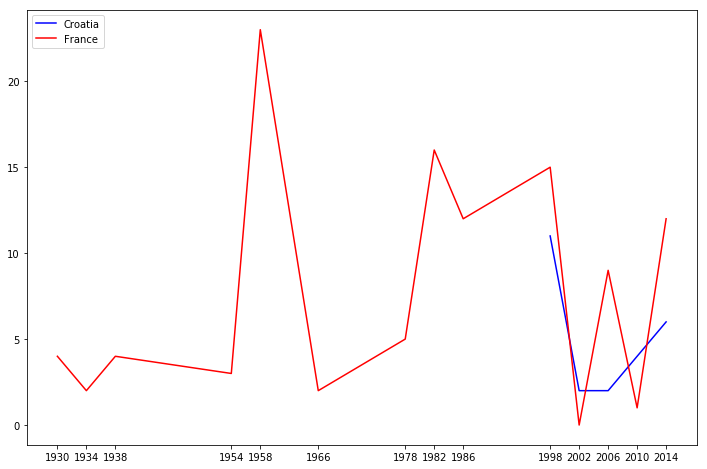

In [56]:
years=[]
years1 =France_faceoff_Yeargoals.Year
years2 =Croatia_faceoff_Yeargoals.Year
years = years1.append(years2)

years_array = pd.Series(years).values
years_array = np.unique(years_array)

years_array_string = years_array.astype(np.str)
#print(years_array_string)

plt.figure(figsize=(12, 8))
plt.plot(Croatia_faceoff_Yeargoals.Year, Croatia_faceoff_Yeargoals.goals, '-b', label='Croatia')
plt.plot(France_faceoff_Yeargoals.Year, France_faceoff_Yeargoals.goals,'-r', label='France')
plt.legend(loc='upper left')
plt.xticks(years_array)
plt.show()

What I find most impressive about these data is the fact that Croatia has only been in the World Cup since 1998 and were matched up to a powerhouse in France.

What a story.